# Tarea 1

**Envío del PR inicial:** viernes 21 de septiembre

**Aceptación del PR:** martes 25 de septiembre

## 1

Consideren el mapeo $F(x) = x^2-2$ definido en el intervalo $[-2,2]$. 

- ¿Qué podemos concluir después de muchos iterados para las condiciones iniciales $x_0=0$, $x_0=0.1$, $x_0=0.001$?
    
- ¿Qué propiedad hace que el interés en este mapeo sea el intervalo [-2,2]$


In [1]:
using Plots
#Pkg.add("Interact")
using Interact # Esto es para tener graficas interactivas

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/411932bbeb63c1e811d5d3c4add71783ae1eeaa7-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/411932bbeb63c1e811d5d3c4add71783ae1eeaa7-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

In [2]:
function iter(F, x0, n_iters=1000)
    xn = [x0]
    for i in 1:n_iters
        push!(xn, F(xn[end]))
    end
    xn
end

iter (generic function with 2 methods)

In [3]:
F(x) = x^2 - 2

F (generic function with 1 method)

In [4]:
x0_range = [0, 0.1, 0.001, 2]
maps_range = [iter(F, x0, 10000) for x0 in x0_range];

## 2

Escriban una función cuyos argumentos son la función `F` del mapeo, `x0`, la condición inicial, y `n` el número de iterados del mapeo (un número entero), que genere los `n` iterados del mapeo y haga el análisis gráfico descrito del mapeo. Ilustren el funcionamiento con $F(x)=\sqrt{x}$.

¿Qué pueden concluir de iterar *muchas* veces una condición inicial?

In [5]:
function itera_mapeo(F, x0; n_iters=100)
    xnn = Float64[x0]
    x = Float64[x0]; y = [-10000.]
    for i in 1:n_iters
        xn = xnn[end]
        Fn = F(xn)
        push!(xnn, Fn)
        push!(x, xn)
        push!(y, Fn)
        push!(x, Fn)
        push!(y, Fn)
    end
    xnn, (x, y)
end

itera_mapeo (generic function with 1 method)

In [6]:
function grafica_mapeo(F, x, y; n=nothing, leg_pos=nothing)
    n == nothing ? n = length(x)-1: nothing
    x_range = [minimum(x), maximum(x) + 2]
    y_range = [minimum(y[2:end]) - 2, maximum(y) + 2]
    xx = linspace(x_range[1], x_range[2], 1000)
    p = plot(xlim=x_range, ylim=y_range)
    plot!(xx, x -> F(x), label="F(x)")
    plot!(xx, x -> x, label="y=x")
    plot!(x[1:n], y[1:n], ls=:dash, marker=(3, .5, :dot), label="Trayectoria")
    p
end

function grafica_mapeo!(F, x, y; n=nothing)
    n == nothing ? n = length(x)-1: nothing
    x_range = [minimum(x), maximum(x) + 2]
    y_range = [minimum(y[2:end]) - 2, maximum(y) + 2]
    xx = linspace(x_range[1], x_range[2], 1000)
    p = plot!(xlim=x_range, ylim=y_range)
    plot!(xx, x -> F(x), label="F(x)")
    plot!(xx, x -> x, label="y=x")
    plot!(x[1:n], y[1:n], ls=:dash, marker=(3, .5, :dot), label="Trayectoria")
    p
end

grafica_mapeo! (generic function with 1 method)

In [7]:
F(x) = sqrt(x)

F (generic function with 1 method)

In [8]:
x0 = 1
xnn, x_y = itera_mapeo(F, x0);

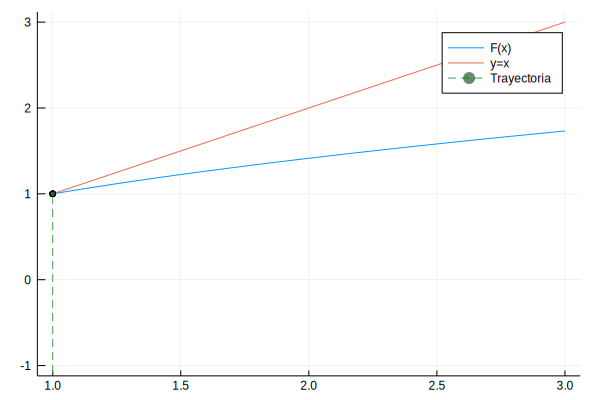

In [9]:
grafica_mapeo(F, x_y...)

## 3

- Usen el análisis gráfico para encontrar los puntos de periodo dos del mapeo $F(x) = x^2 -1.1$. Den explícitamente los puntos fijos.
    
- Usen el método de Newton, usando iterados iniciales  sagazmente seleccionados, para obtener los puntos fijos.

In [10]:
include("utils.jl") # Cargo cosas de notebooks pasados(newton)

newton

Probemos algunos puntos como condición inicial.

In [11]:
F(x) = x^2 - 1.1

F (generic function with 1 method)

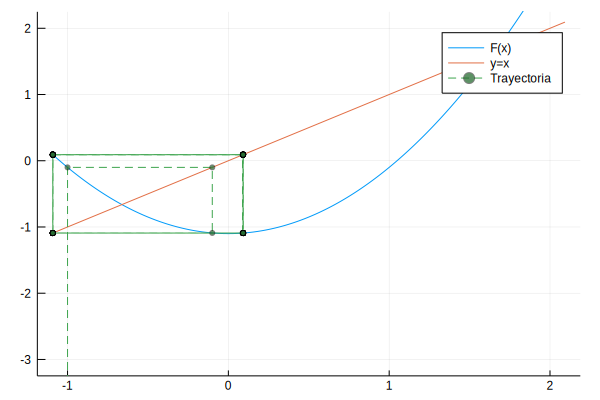

In [12]:
x0 = -1.
xnn, x_y = itera_mapeo(F, x0)
grafica_mapeo(F, x_y...)

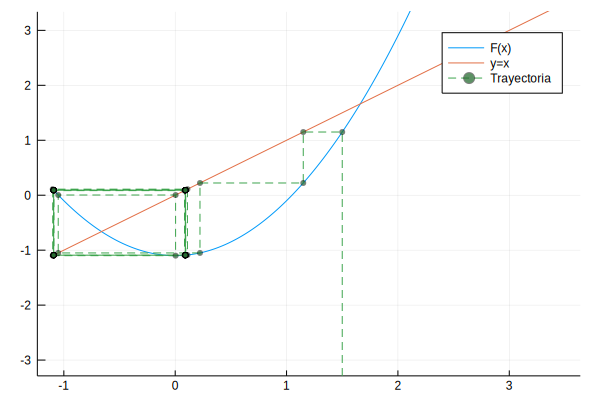

In [13]:
x0 = 1.5
xnn, x_y = itera_mapeo(F, x0)
grafica_mapeo(F, x_y...)

De las figuras anteriores observamos las órbitas periódicas, estas son el "cuadrado".

Pongámonos más rigurosos, usemos el método de Newton para dar con los puntos fijos.

In [14]:
?newton

search:



```
newton(f, f', x0, n_iter)
```

Devuelve las raíces de la función `f`.


Para esta $F$ los puntos fijos han de satisfacer
$$
F(x) = x^2 - 1.1 = x\\
\Rightarrow x^2-x-1.1 = 0
$$
Hay que emplear el método de Newton para encontrarlos, prosigamos.

In [15]:
g(x) = x^2 - x - 1.1
g′(x) = 2 * x - 1

g′ (generic function with 1 method)

In [16]:
print("Este es un punto fijo: " ,newton(g, g′, -1.3))

Este es un punto fijo: -0.6618950038622251

In [17]:
print("Este es otro punto fijo: ", newton(g, g′, 1.3))

Este es otro punto fijo: 1.661895003862225

Ya conociendo exáctamente estos puntos fijos veamos qué pasa cuando iniciamos cerca de ellos.

In [40]:
x0 = -0.6718950038622251
xnn, x_y = itera_mapeo(F, x0)

@manipulate for n=slider(1:100, value=1) # Con esto hago la gráfica de forma interactiva!
    grafica_mapeo(F, x_y..., n=n)
end

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_32", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-cad39e4c-acb9-4c83-a54e-f40b7f3482df", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:max, 100),Pair{Symbol,Any}(:min, 1),Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:step, 1),Pair{Symbol,Any}(:className, "slider slider is-fullwidth"),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_31", 1, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/Users/uzielnmtz/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/Users/uzielnmtz/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/Users/uzielnmtz/.julia/v0.6/InteractBase/src/../assets/all.js", "/Users/uzielnmtz/.julia/v0.6/InteractBase/src/../assets/style.css", "/Users/uzielnmtz/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":1}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(funct

Al parecer cuando se inicia cerca de este punto fijo la órbita se aleja de él, veamos que sucede en el otro punto.

In [19]:
x0 = 1.561895003862225
xnn, x_y = itera_mapeo(F, x0)

@manipulate for n=slider(1:100, value=1) # Con esto hago la gráfica de forma interactiva!
    grafica_mapeo(F, x_y..., n=n)
end

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_08", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-59ec6546-f39a-4a07-9804-5426ce08ac55", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:max, 100),Pair{Symbol,Any}(:min, 1),Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:step, 1),Pair{Symbol,Any}(:className, "slider slider is-fullwidth"),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_07", 1, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/Users/uzielnmtz/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/Users/uzielnmtz/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/Users/uzielnmtz/.julia/v0.6/InteractBase/src/../assets/all.js", "/Users/uzielnmtz/.julia/v0.6/InteractBase/src/../assets/style.css", "/Users/uzielnmtz/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":1}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(funct

Notemos que el otro punto fijo también repele, ambos puntos repelen, lo interesante es que al ser estos dos puntos repelentes se crea una zona "estable", estos son los puntos de periodicidad 2. Veamos quiénes son.

In [20]:
println("El primer punto es: ", xnn[end])
print("El segundo punto es: ", xnn[end-1])

El primer punto es: -1.0916079783099617
El segundo punto es: 0.0916079783099617

In [21]:
# Hay que guardarlos para futuro uso
xp1 = xnn[end]
xp2 = xnn[end-1]

0.0916079783099617

## 4

Hagan un análisis completo de las posibles órbitas de los siguientes mapeos, usando distintos colores para distintas órbitas. Interesa entre otras cosas saber cuántos puntos fijos tiene y cómo es la dinámica cerca de ésos puntos.

- $F_1(x) = \frac{1}{3x}$.

- $F_2(x) = -\frac{x^5}{5}$.

- $F_3(x) = \frac{x}{2}-2$.

In [22]:
F₁(x) = 1 / (3*x)
F₂(x) = - x^5 / 5
F₃(x) = (x / 2) - 2

F₃ (generic function with 1 method)

In [23]:
cond_iniciales = -20:.2:20
raices = [newton(x->F₂(x)-x, x->-x^4-1, complex(x0, x0)) for x0 in cond_iniciales]
unique(raices)

3-element Array{Complex{Float64},1}:
 -1.05737-1.05737im
      0.0+0.0im    
  1.05737+1.05737im

In [24]:
x0 = 1.4
xnn1, p = itera_mapeo(F₁, x0, n_iter=3)
p

LoadError: [91mMethodError: no method matching itera_mapeo(::#F₁, ::Float64; n_iter=3)[0m
Closest candidates are:
  itera_mapeo(::Any, ::Any; n_iters) at In[5]:2[91m got unsupported keyword argument "n_iter"[39m[39m

## 5

- Para el mapeo mapeo $F(x) = x^2-2$ en el intervalo $[-2,2]$ (ejercicio 1), consideren un punto al azar en el intervalo $[-2,2]$ y construyan una órbita muy larga, por ejemplo, de $20\,000$ iterados. Obtengan el histograma de frecuencia (normalizado) de visita de los puntos de la órbita. ¿Qué conclusión podemos sacar de este histograma?

- \Repitan el inciso anterior para el mapeo: $G(x) = 2x \mod 1$ en el intervalo [0,1].

(NOTA: En cuanto al histograma, pueden construir su propia función que haga el histograma, o buscar en las entrañas de la documentación.)

## 6

Analicen los mapeos

- F(x) = x^2,

- F(x) = x^3,

- F(x) = -x^3,

que se satisface $F(0) = F'(0) = 0$. ¿Qué podemos decir de la convergencia?

In [25]:
F(x) = x^2
G(x) = x^3
H(x) = -x^3

H (generic function with 1 method)

#### Mapeo $F(x) = x^2$

Encontremos los puntos fijos mediante el método de Newton.

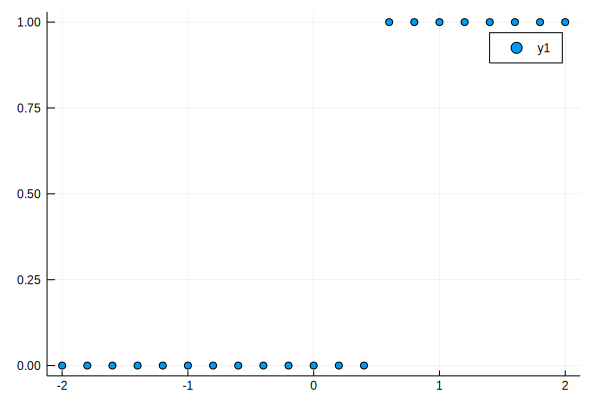

In [26]:
# Para el primer mapeo
cond_iniciales = -2:0.2:2
raices = [newton(x -> x^2-x, x -> 2*x - 1, x0) for x0 in cond_iniciales];
scatter(cond_iniciales, raices)

Lo anterior nos dice que $1$ y $0$ son puntos fijos, veamos el comportamiento alrededor de esos puntos.

In [27]:
srand(42);

In [28]:
# Ojo aquí, la siguiente celda puede fallar si alguno de estos puntos cae a la derecha del punto fijo 2
# Esto es así porque rápidamente se va a infinito
δ = 0.1 * randn()
x0_1 = 0 + δ; x0_2 = 1 + δ; 

In [29]:
fnn1, x_y1 = itera_mapeo(F, x0_1, n_iters=30)
fnn2, x_y2 = itera_mapeo(F, x0_2, n_iters=30)

@manipulate for n=slider(1:length(x_y1[1]), value=1)
    grafica_mapeo(F, x_y1..., n=n)
    grafica_mapeo!(F, x_y2..., n=n)
end

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_14", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-0e0c4d93-4871-4b64-86f2-c4556c7aeb39", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:max, 61),Pair{Symbol,Any}(:min, 1),Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:step, 1),Pair{Symbol,Any}(:className, "slider slider is-fullwidth"),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_13", 1, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/Users/uzielnmtz/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/Users/uzielnmtz/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/Users/uzielnmtz/.julia/v0.6/InteractBase/src/../assets/all.js", "/Users/uzielnmtz/.julia/v0.6/InteractBase/src/../assets/style.css", "/Users/uzielnmtz/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":1}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(functi

De lo anterior se concluyen dos cosas, el punto fijo $x^*=0$ es un punto atractor, mientras que el punto $x^*=1$ es un punto repulsor.

#### Mapeo $G(x) = x^3$

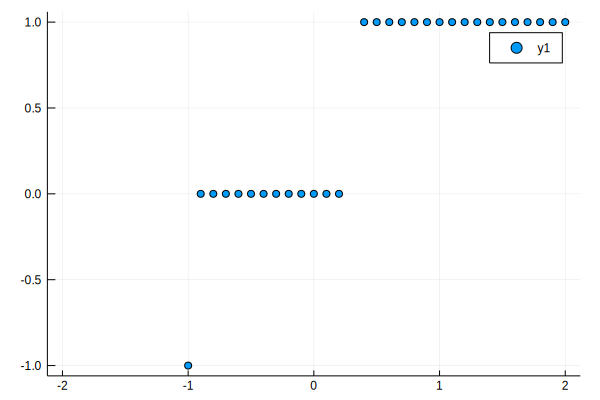

In [30]:
cond_iniciales = -2:0.1:2
raices = [newton(x -> x^3-x, x -> 3*x - 1, x0) for x0 in cond_iniciales];
scatter(cond_iniciales, raices)

Se tienen pues 3 raíces: $-1$, $0$, $1$. Veamos qué comportamiento tienen estos 3 puntos fijos.

In [31]:
# Aquí no se presenta el mismo problema que el anterior puesto que se ha cambiado de randn a rand
# Y se ha usado el hecho de que el primer punto si se acerca por la izq de él se diverge
# Para el tercero ocurre lo mismo pero por la derecha
# Estos dos puntos son repelentes, mientras que el 0 es atractor
# Veamos
δ = 0.1 * rand()
x0_1 = -1 + δ; x0_2 = 0 + δ; x0_3 = 1 - δ;

In [32]:
gnn1, x_y1 = itera_mapeo(G, x0_1, n_iters=20)
gnn2, x_y2 = itera_mapeo(G, x0_2, n_iters=20)
gnn3, x_y3 = itera_mapeo(G, x0_3, n_iters=20)

@manipulate for n=slider(1:length(x_y1[1]), value=1)
    grafica_mapeo(G, x_y2..., n=n)
    grafica_mapeo!(G, x_y3..., n=n)
    grafica_mapeo!(G, x_y1..., n=n)
end

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_20", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-f797f01c-593a-4595-96ca-ffdcaaf48a90", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:max, 41),Pair{Symbol,Any}(:min, 1),Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:step, 1),Pair{Symbol,Any}(:className, "slider slider is-fullwidth"),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_19", 1, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/Users/uzielnmtz/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/Users/uzielnmtz/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/Users/uzielnmtz/.julia/v0.6/InteractBase/src/../assets/all.js", "/Users/uzielnmtz/.julia/v0.6/InteractBase/src/../assets/style.css", "/Users/uzielnmtz/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":1}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(functi

En este caso el primer punto fijo es repulsor, el segundo un atractor y el último un repulsor.

#### Mapeo $H(x) = -x^3$

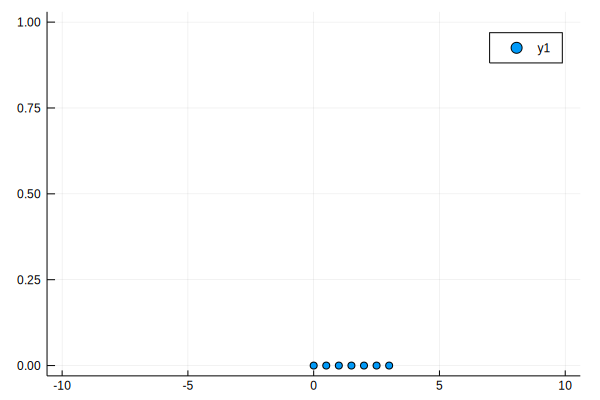

In [33]:
cond_iniciales = -10:0.5:10
raices = [newton(x -> -x^3-x, x -> -3*x - 1, x0) for x0 in cond_iniciales];
scatter(cond_iniciales, raices)

Sólo hay una raíz real, este es el único punto fijo.

In [34]:
δ = 0.1 * randn()
x0 = 0 + δ;

In [35]:
hnn, x_y = itera_mapeo(H, x0)
@manipulate for n=slider(1:length(x_y[1]), value=1)
    grafica_mapeo(H, x_y..., n=n)
end

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_26", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-a9b8e64c-7c90-4887-956b-ec433f3f1b97", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:max, 201),Pair{Symbol,Any}(:min, 1),Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:step, 1),Pair{Symbol,Any}(:className, "slider slider is-fullwidth"),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_25", 1, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/Users/uzielnmtz/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/Users/uzielnmtz/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/Users/uzielnmtz/.julia/v0.6/InteractBase/src/../assets/all.js", "/Users/uzielnmtz/.julia/v0.6/InteractBase/src/../assets/style.css", "/Users/uzielnmtz/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":1}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(funct

Es un punto atractor.

## 7

Analicen los mapeos

- F(x) = x,

- F(x) = -x,

- F(x) = x-x^2,

que se satisface $F(0) = 0$ y $|F'(0)| = 1$. (Este tipo de puntos son *neutralmente* atractivos o repulsivos.) ¿Qué podemos decir de la convergencia?

## 8

En el ejercicio 3, implementaron el análisis gráfico (y el método de Newton) para encontrar los puntos de periodo dos del mapeo $F(x) = x^2 -1.1$. Usen el módulo de duales para mostrar la estabilidad de esos puntos.

In [36]:
using Base.Test
include("DifAuto.jl")

deriva

In [37]:
F(x) = x^2 - 1.1
F²(x) = F(F(x))

F² (generic function with 1 method)

Se tenía que los puntos periódicos eran $x_1^*=-1.0916079783099617$ y $x_2^*=0.0916079783099617$.

Lo que se busca es mostrar que

\begin{equation}
\frac{\textrm{d}F^2(x_0)}{\textrm{d}x} = F'(F(x_0)) F'(x_0) = F'(x_1) F'(x_0).
\end{equation}

In [38]:
xp1D = dual(xp1)
xp2D = dual(xp2)

0.0916079783099617+1.0ε

In [39]:
@test deriva(F², xp1) == deriva(F, xp1) * deriva(F, xp2)

Test Passed

Éxito!!